In [26]:
import pandas as pd

In [27]:
data=pd.read_csv(r'C:\Users\Nayee\OneDrive\Desktop\matplotlib\env\climate_change_impact_on_agriculture_2024.csv')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder on the categorical columns
data['encoded_year'] = label_encoder.fit_transform(data['Year'])
data['encoded_country'] = label_encoder.fit_transform(data['Country'])
data['encoded_Crop_type'] = label_encoder.fit_transform(data['Crop_Type'])
data['encoded_stg'] = label_encoder.fit_transform(data['Adaptation_Strategies'])
data['encoded_region']=label_encoder.fit_transform(data['Region'])


In [30]:
data.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD', 'encoded_year', 'encoded_country',
       'encoded_Crop_type', 'encoded_stg', 'encoded_region'],
      dtype='object')

In [31]:
data=data.drop(columns=['Year','Country','Region','Adaptation_Strategies'])

In [32]:
data.columns

Index(['Crop_Type', 'Average_Temperature_C', 'Total_Precipitation_mm',
       'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events',
       'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA',
       'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
       'Economic_Impact_Million_USD', 'encoded_year', 'encoded_country',
       'encoded_Crop_type', 'encoded_stg', 'encoded_region'],
      dtype='object')

In [33]:
import statsmodels.api as sm

In [34]:
data=data.drop(columns=['Crop_Type'])

In [35]:
X=data.drop(columns=['Economic_Impact_Million_USD'])
y=data['Economic_Impact_Million_USD']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)
X_train=sm.add_constant(X_train)

In [39]:
model=sm.OLS(y_train,X_train).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Economic_Impact_Million_USD   R-squared:                       0.525
Model:                                     OLS   Adj. R-squared:                  0.524
Method:                          Least Squares   F-statistic:                     591.1
Date:                         Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                                 20:09:38   Log-Likelihood:                -53088.
No. Observations:                         7500   AIC:                         1.062e+05
Df Residuals:                             7485   BIC:                         1.063e+05
Df Model:                                   14                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        6.4139     23.635      0.271      0.786     -39.917      52.745
Average_Temperature_C        0.1413      0.301      0.470      0.639      -0.448       0.731
Total_Precipitation_mm      -0.0008      0.004     -0.192      0.848      -0.009       0.007
CO2_Emissions_MT             0.4114      0.389      1.058      0.290      -0.351       1.174
Crop_Yield_MT_per_HA       301.9592      3.466     87.113      0.000     295.164     308.754
Extreme_Weather_Events       0.2241      1.048      0.214      0.831      -1.830       2.278
Irrigation_Access_%          0.0062      0.128      0.049      0.961      -0.244       0.257
Pesticide_Use_KG_per_HA     -0.1591      0.230     -0.692      0.489      -0.610       0.292
Fertilizer_Use_KG_per_HA     0.0789      0.116      0.682      0.495      -0.148       0.305
Soil_Health_Index            0.0224      0.165      0.136      0.892      -0.300       0.345
encoded_year                 0.1677      0.329      0.509      0.611      -0.478       0.813
encoded_country             -0.2940      1.162     -0.253      0.800      -2.571       1.983
encoded_Crop_type           -1.2726      1.155     -1.102      0.270      -3.536       0.991
encoded_stg                 -3.8259      2.349     -1.629      0.103      -8.430       0.778
encoded_region              -0.4152      0.343     -1.211      0.226      -1.087       0.257
==============================================================================
Omnibus:                        0.549   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.574
Skew:                           0.019   Prob(JB):                        0.751
Kurtosis:                       2.981   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
predictions = model.predict(sm.add_constant(X_test))

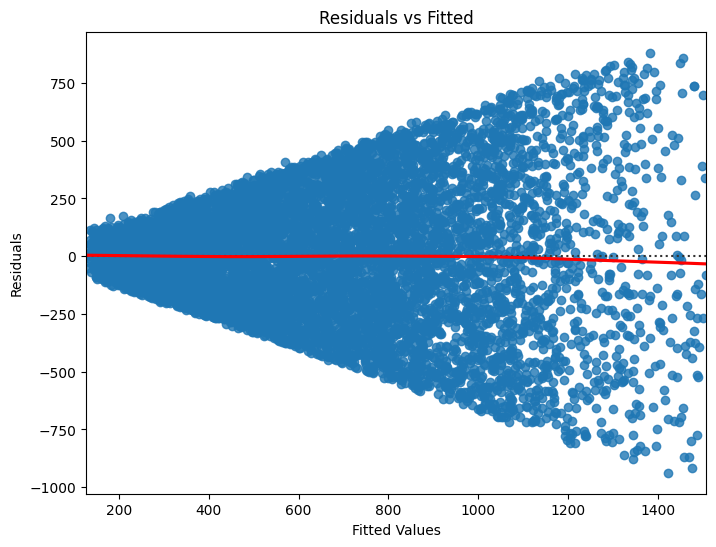

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


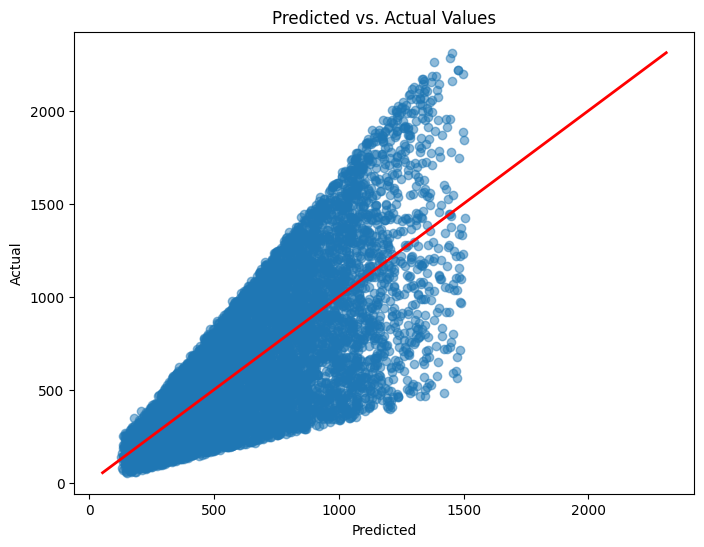

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, y_train, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)  
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs. Actual Values')
plt.show()


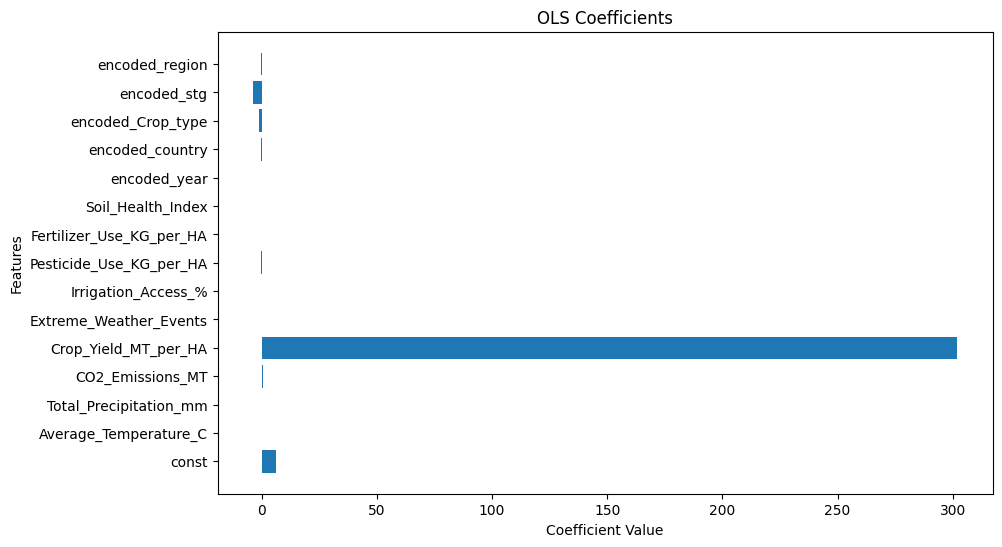

In [44]:

coefficients = model.params
features = coefficients.index


plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('OLS Coefficients')
plt.show()


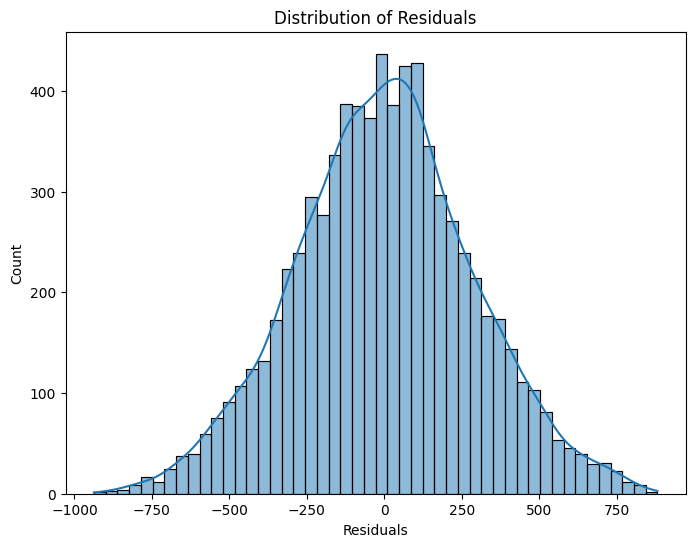

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()



In [46]:
data.columns

Index(['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
       'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Economic_Impact_Million_USD', 'encoded_year',
       'encoded_country', 'encoded_Crop_type', 'encoded_stg',
       'encoded_region'],
      dtype='object')

In [47]:
data=data.drop(columns=['encoded_year'])

In [48]:
data.columns

Index(['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
       'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Economic_Impact_Million_USD', 'encoded_country',
       'encoded_Crop_type', 'encoded_stg', 'encoded_region'],
      dtype='object')

In [49]:
data.head()

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD,encoded_country,encoded_Crop_type,encoded_stg,encoded_region
0,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,808.13,6,2,4,32
1,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,616.22,4,2,0,8
2,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,796.96,5,9,4,4
3,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,790.32,3,1,2,18
4,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,401.72,6,7,0,28


In [50]:
X=data.drop(columns=['Economic_Impact_Million_USD'])
y=data['Economic_Impact_Million_USD']